In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import cross_val_score
from sklearn.svm import SVC
from sklearn import preprocessing

In [22]:
datosPacientes = pd.read_csv('depresjon-dataset/data/scores.csv', na_values='--undefined--')
datosPacientes = datosPacientes.drop(columns=['number'])
datosPacientes = datosPacientes.drop(columns=['days'])
actividadPaciente = []
for i in range(0, 22):
    path = 'depresjon-dataset/data/condition/condition_' + str(i+1) + '.csv'
    actividadPaciente.append(pd.read_csv(path, na_values='--undefined--'))

In [23]:
datosPacientes

,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2
0,2,35-39,2,2,6-10,1,2,19,19
1,2,40-44,1,2,6-10,2,2,24,11
2,1,45-49,2,2,6-10,2,2,24,25
3,2,25-29,2,2,11-15,1,1,20,16
4,2,50-54,2,2,11-15,2,2,26,26
5,1,35-39,2,2,6-10,1,2,18,15
6,1,20-24,1,2,11-15,2,1,24,25
7,2,25-29,2,2,11-15,1,2,20,16
8,2,45-49,1,2,6-10,1,2,26,26
9,2,45-49,2,2,6-10,1,2,28,21


In [24]:
for i in range(0, 22):
    actividadPaciente[i] = actividadPaciente[i].drop(columns=['date'])

In [25]:
for i in range(0, 22):
    actividadPaciente[i].index = pd.DatetimeIndex(actividadPaciente[i].timestamp)
    actividadPaciente[i] = round(actividadPaciente[i].resample('6H').mean(),2)
#actividadPaciente.resample('1H').sum()

In [26]:
for i in range(0, 22):
    actividadPaciente[i]['hour'] = actividadPaciente[i].index
    actividadPaciente[i].hour = actividadPaciente[i].hour.astype(str).tolist()
    actividadPaciente[i] = actividadPaciente[i].reset_index(drop=True)

In [27]:
for i in range(0, 22):
    times = []
    for time in actividadPaciente[i].hour:
        times.append(time.split(' ')[1])
    actividadPaciente[i].hour = times

In [28]:
actividadPaciente[1] = actividadPaciente[1][:80]
actividadPaciente[12] = actividadPaciente[12][:60]
actividadPaciente[15] = actividadPaciente[15][:70]
actividadPaciente[18] = actividadPaciente[18][:60]
actividadPaciente[21] = actividadPaciente[21][:70]

/home/ismael/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


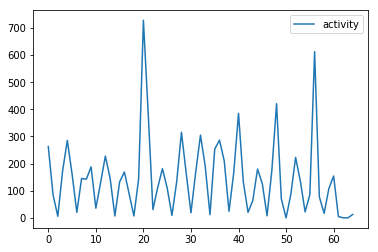

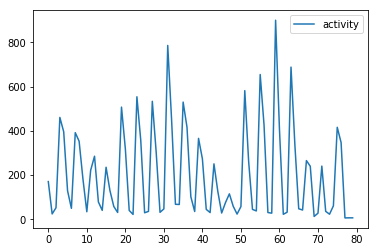

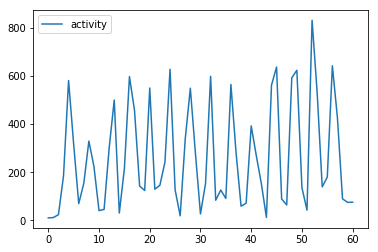

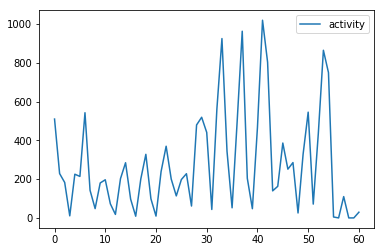

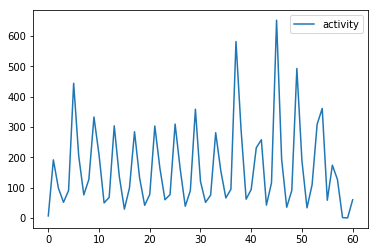

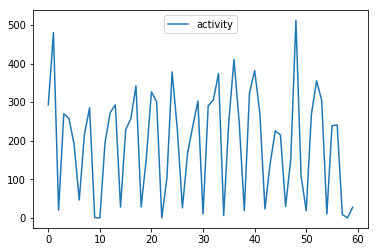

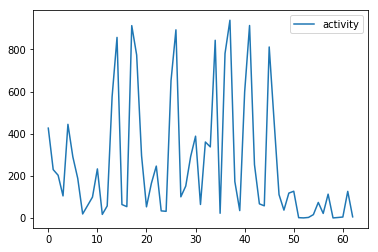

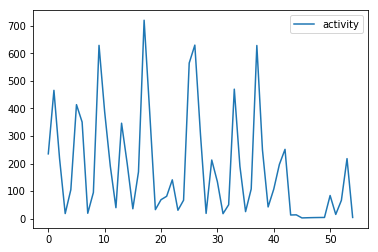

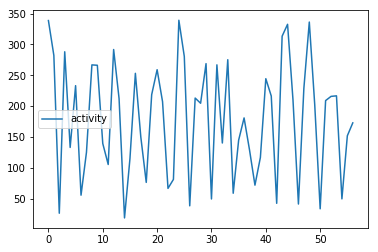

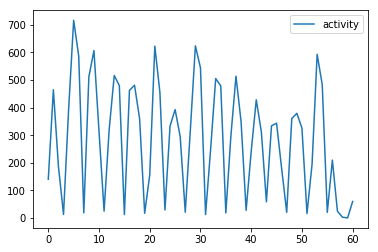

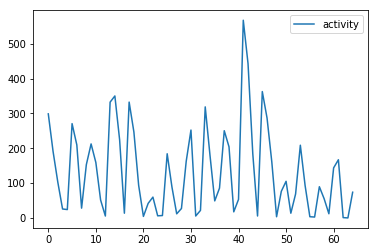

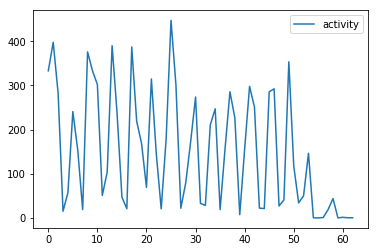

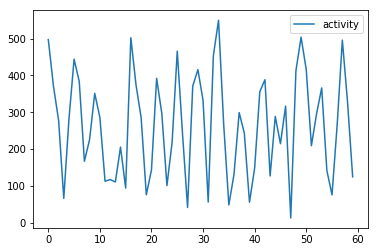

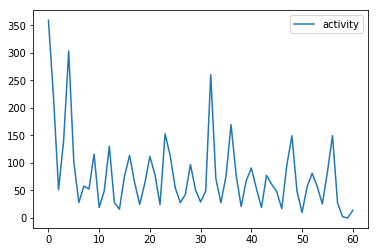

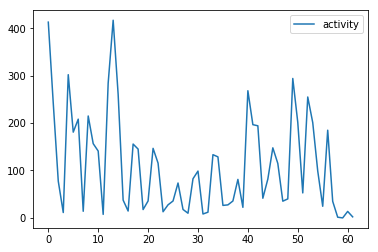

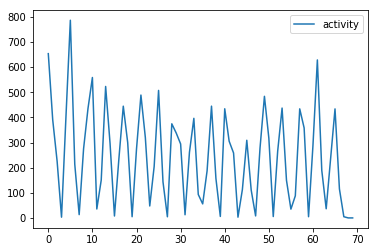

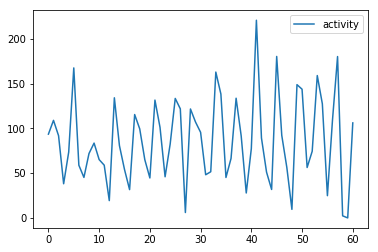

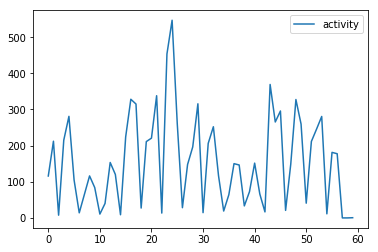

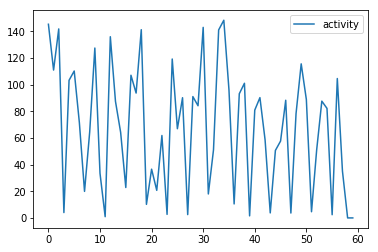

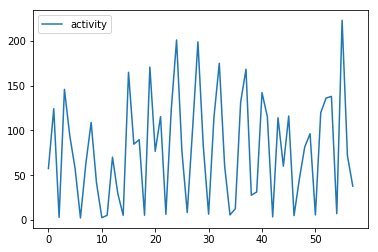

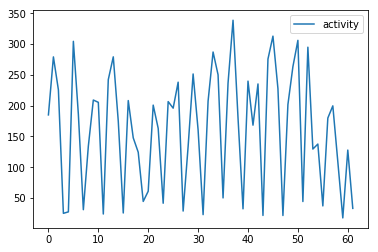

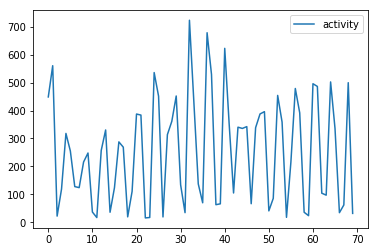

In [29]:
for i in range(0, 22):
    actividadPaciente[i].plot()

In [30]:
finalDF = pd.DataFrame()
for i in range(0, 22):
    df1 = actividadPaciente[i]
    df2 = datosPacientes[i:i+1].reindex(datosPacientes[i:i+1].index.repeat(len(actividadPaciente[i]))).reset_index(drop=True)
    auxDF = pd.concat([df1,df2], axis=1)
    finalDF = pd.concat([finalDF,auxDF]).reset_index(drop=True)

In [31]:
le = preprocessing.LabelEncoder()
finalDF.age = le.fit_transform(finalDF.age)
finalDF.edu = le.fit_transform(finalDF.edu)
finalDF.hour = le.fit_transform(finalDF.hour)
X_activity = finalDF.drop(['afftype'], axis=1)
y_activity = finalDF.afftype

In [33]:
mejorC = 0
mejorGamma = 0
maxPredictSVM = 0.0
for i in [1, 10, 100, 1000]:
    for j in [0.1, 0.01, 0.001, 1]:
        model = SVC(kernel='rbf', C=i, gamma=j)
        scores = cross_val_score(model, X_activity, y_activity, cv=10, scoring='accuracy')
        if scores.mean() > maxPredictSVM:
            maxPredictSVM = scores.mean()
            mejorC = i
            mejorGamma = j
        print('C =', i, 'gamma =', j, ':', scores.mean())

C = 1 gamma = 0.1 : 0.7631892201250108
C = 1 gamma = 0.01 : 0.7623706683653394
C = 1 gamma = 0.001 : 0.7201876835567408
C = 1 gamma = 1 : 0.7079096354779078
C = 10 gamma = 0.1 : 0.7464537161131138
C = 10 gamma = 0.01 : 0.752040766625037
C = 10 gamma = 0.001 : 0.7806297266217493
C = 10 gamma = 1 : 0.71811282170709
C = 100 gamma = 0.1 : 0.7464537161131138
C = 100 gamma = 0.01 : 0.7987081867352833
C = 100 gamma = 0.001 : 0.7594508842307304
C = 100 gamma = 1 : 0.71811282170709
C = 1000 gamma = 0.1 : 0.7464537161131138
C = 1000 gamma = 0.01 : 0.7987081867352833
C = 1000 gamma = 0.001 : 0.86656472346718
C = 1000 gamma = 1 : 0.71811282170709
